In [75]:
import torch
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

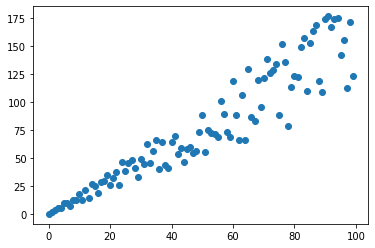

In [76]:
x_points = []
y_points = []

for i in range(100):
    x_points.append(float(i))
    y_points.append(rand.uniform(x_points[-1], 2*x_points[-1]))


plt.plot(x_points, y_points, "o")
plt.show()

In [77]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.3, random_state=42)


In [78]:
# Now that we've generated some points at random, its time to use torch 
# to execute linear regression

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [79]:
# Solve for alpha and beta in Bivariate regression 

alpha = 0

run_num = 0
run_den = 0

for i, x in enumerate(X_train):
    run_num += (x - torch.mean(X_train)) * (y_train[i] - torch.mean(y_train))
    run_den += (x - torch.mean(X_train))**2

alpha = run_num/run_den

beta = torch.mean(y_train) - alpha*torch.mean(X_train)

alpha, beta

(tensor(1.6045), tensor(-3.5079))

In [80]:
# Define the regression function

def regression_line(alpha, beta, x_values):

    y_pred = []

    for x in x_values:
        y_pred.append(alpha*x + beta)

    return y_pred

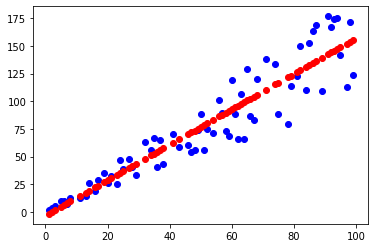

In [81]:
# Call the function and get y_pred

y_pred  = regression_line(alpha, beta, X_train)

plt.plot(X_train, y_train, "o", color="blue")
plt.plot(X_train, y_pred, "o", color="red")

plt.show()

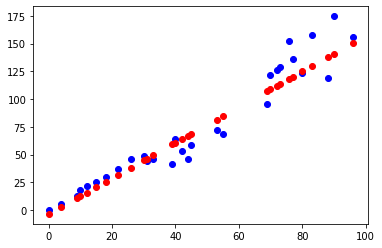

In [82]:
# Time to see ho well it abstracts to unseen data

y_pred  = regression_line(alpha, beta, X_test)

plt.plot(X_test, y_test, "o", color="blue")
plt.plot(X_test, y_pred, "o", color="red")

plt.show()

Looks like it did a fairly decent job of approximating this linearly generated set, which we expected. We can try experimenting how well it will work for other forms of data

In [83]:
# Lets calculate the mean squared error

def MSE(y_pred, y_true):

    residuals = 0

    for i in range(len(y_pred)):
        residuals += (y_pred[i] - y_true[i])**2

    return residuals/len(y_pred)

In [84]:
MSE(y_pred, y_test)

tensor(199.6128)